# Lecture 4 - More on NumPy Arrays: Slicing and `np.linalg`

## Overview, Objectives, and Key Terms
 
In this lesson, we'll continue our investigation started in [Lesson 3](ME400_Lecture_3.ipynb) and look multidimensional arrays and how to access multiple elements via *slicing*.  

### Objectives

By the end of this lesson, you should be able to

- *define and manipulate two-dimensional NumPy arrays*
- *visualize two-dimensional arrays*
- *slicing and other indexing of one- and two-dimensional arrays*

### Key Terms

- `np.ones` (for 2-D arrays)
- `np.zeros` (for 2-D arrays)
- `np.array` (for 2-D arrays)
- `np.meshgrid`
- `plt.contour`
- `plt.contourf`
- `plt.colorbar`
-  colormap
- slice
- stride
- `np.reshape`
- `np.random.rand`
- matrix-vector multiplication
- `np.dot` (for 2-D arrays)
- `np.matmul`

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

## Making Two-Dimensional Arrays

A lot of data lives in tabulated structures that are logically equivalent to two-dimensional arrays.  We actually saw that in [Lesson 3](ME400_Lecture_3.ipynb) with our time, velocity, and acceleration example.  When loaded in via `np.loadtxt`, that data was stored as an array having a shape of `(3, 10)`.

We can make such two-dimensional arrays.  The easiest ways are the `np.ones` and `np.zeros` functions, e.g.,

In [2]:
import numpy as np
A = np.ones((3, 3))
A

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [3]:
B = np.zeros((3, 3))
B

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

We can access and modify individual elements of these arrays just like we can their one-dimensional cousins.  For example, let's change the lower-right element of `B` to 99:

In [4]:
B[2, 0] = 99
B

array([[  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [ 99.,   0.,   0.]])

When indexing a two-dimensional array, the syntax is always like `B[i, j]`, where `i` is the *row* and `j` is the *column*.  

Two-dimensional arrays can also be made directly from existing data, e.g.,

In [5]:
C = np.array([[1, 2], 
              [3, 4]]) # By splitting this line, the structure is much easier to see.
C

array([[1, 2],
       [3, 4]])

Here, the input to `np.array` is `[[1, 2], [3, 4]]`, which is actually a `list` with elements that are themselves `list`'s.  The key is that we need each row to have the form `[x, y, ...]`, and all rows need to be separated by commas and surrounded by an additional pair of `[]`'s.

Recall that often we need to evaluate a function $f(x)$ at evenly-spaced points in some range.  The same is true in two and three dimensions.  We'll stick in 2-D for now and consider evaluation of the two-dimensional function 

$$
f(x, y) = (x + 2y + 7)^2 + (2x + y - 5)^2
$$

which is known as [Booth's function](https://www.sfu.ca/~ssurjano/booth.html).  Here, we want to evaluate $f(x, y)$ for $x, y \in [-10, 10]$.  First, we'll define the arrays `x` and `y` using evenly-spaced points in the range $[-10, 10]$. 

In [6]:
x = np.linspace(-10, 10, 5) 
y = np.linspace(-10, 10, 5)

Now, imagine these points as defining a *grid* in the $xy$ plane.  How can we evaluate $f(x, y)$ at each possible pair of points $(x_i, y_j)$?  The "programming" approach---and one we'll learn later---would be to employ *loops*.  However, NumPy provides an easy and *efficient* way to do this for us in its `np.meshgrid` function.

In [7]:
xx, yy = np.meshgrid(x, y) 
xx

array([[-10.,  -5.,   0.,   5.,  10.],
       [-10.,  -5.,   0.,   5.,  10.],
       [-10.,  -5.,   0.,   5.,  10.],
       [-10.,  -5.,   0.,   5.,  10.],
       [-10.,  -5.,   0.,   5.,  10.]])

In [8]:
yy

array([[-10., -10., -10., -10., -10.],
       [ -5.,  -5.,  -5.,  -5.,  -5.],
       [  0.,   0.,   0.,   0.,   0.],
       [  5.,   5.,   5.,   5.,   5.],
       [ 10.,  10.,  10.,  10.,  10.]])

Notice that these new arrays (named `xx` and `yy` so that we don't *overwrite* `x` and `y`) are two dimensional.  However, by marching through, for example, the top rows, we see that the resulting pairs of numbers are $(-10, -10)$, $(-5, -10)$, $(0, -10)$ and so on.  Hence, all of the 5 possible values of $x$ are paired with the value $y = -10$ (first row) and then $y = -5$ (second row), etc.

We can now evaluate the desired function.

In [9]:
f = (xx + 2*yy + 7)**2 + (2*xx + yy - 5)**2
f

array([[ 1754.,   949.,   394.,    89.,    34.],
       [ 1069.,   464.,   109.,     4.,   149.],
       [  634.,   229.,    74.,   169.,   514.],
       [  449.,   244.,   289.,   584.,  1129.],
       [  514.,   509.,   754.,  1249.,  1994.]])

## Visualizing 2-D Arrays

We saw in [Lesson 3](ME400_Lecture_3.ipynb) how easily one can produce a plot of 1-D data (in the form of NumPy arrays) by using Matplotlib.  We can also visualize 2-D data.  First, let's give ourselves a somewhat richer set of data to visualize by increasing the number of $x$ and $y$ points we use to evaluate $f(x, y)$.

In [10]:
x, y = np.linspace(-10, 10, 100), np.linspace(-10, 10, 100)
# note how two assignments can be written in one line 
xx, yy = np.meshgrid(x, y)
f = (xx + 2*yy + 7)**2 + (2*xx + yy - 5)**2

One way to visualize $f(x, y)$ is through use of *[contour](http://www.itl.nist.gov/div898/handbook/eda/section3/contour.htm)* plots.  Matplotlib offers two versions of a contour plot: `plt.contour` and `plt.contourf`, where the latter is a "filled" version.  Here they are for our data:

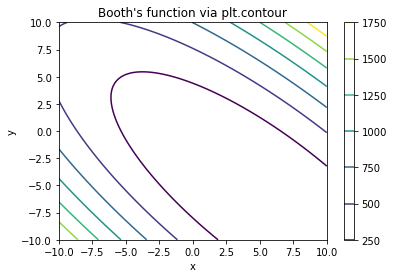

In [11]:
import matplotlib.pyplot as plt
plt.contour(x, y, f)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Booth's function via plt.contour") # Sometimes, a title is useful if no caption can be provided.
plt.colorbar() # The colorbar function produces the color legend at the right.
plt.show()

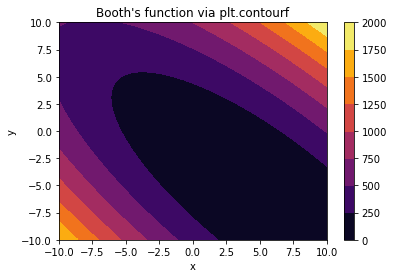

In [12]:
plt.contourf(x, y, f, cmap=plt.cm.inferno)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Booth's function via plt.contourf") 
plt.colorbar()
plt.show()

Here, I've added the `cmap` argument to `plt.contourf`, which changes the colormap (i.e., color scheme) of the image.  Matplotlib provides [dozens of options](https://matplotlib.org/examples/color/colormaps_reference.html), but it's strongly recommended to use one of the "perceptually uniform sequential" colormaps, which provide good contrast in black and white and are more easily interpreted by folks with colorblindness than more traditional colormaps like "jet."

Other functions of interest include `plt.pcolor` and `plt.imshow`, which are left to the reader to explore using `help` and online documentation.

## Slicing

Now we turn to a useful operation known as *slicing*, a process by which we can access more than one element of an array.  We'll find that slicing is also applicable to other data types, including the container types `list` and `tuple` that will be explored later on.

### Slicing in 1-D

For starters, let's create a one dimensional array of the numbers $0, 1, \ldots, 9$:

In [13]:
a = np.arange(10)

We already saw that individual elements of an array like `a` can be accessed via the `[]` operator, e.g., `a[2]` gives us the third element (because numbering starts at zero).  Suppose we want to define a new array `b` that has the first three elements of `a`.  We can *slice* `a` by doing

In [14]:
b = a[0:3]

Here, the `:` is the key, and the syntax `0:3` can be read as `from 0 up to but not including 3`.  That's key: we get `a[0]`, `a[1]`, and `a[2]`, but *not* `a[3]`.

> **Note**.  Basic slicing of an array `a` has the form `a[start:end]`, where the second number `end` is one plus the location of the last element desired.

The slicing syntax also allows a third number called the *stride*.  For example, a stride of two lets one select only every other element.  Here, we can get let `c` be all the even-indexed elements of `a`:

In [15]:
c = a[0:10:2]

Again, the syntax `0:10:2` can be read as `from 0 up to 10, skipping every other element`.  


There are a couple of shortcuts one can use in slicing.  For example, each of the three numbers has a *default* value.  The starting value defaults to the beginning of the array, i.e., element zero, while the ending value defaults to the length of the array.  The stride, by default, is one, which means no elements are skipped.  When the stride is not defined, the second `:` can be omitted. Because these defaults are defined, the following are equivalent:

In [16]:
a[0:10:1]
a[0:10]
a[:10:1]
a[0::1]
a[0::]
a[:10:]
a[::1]
a[::]
a[:]
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

> **Note**. The complete slicing syntax for an array `a` is `a[start:end:stride]`.  By default, `start = 0`, `end = len(a)`, and `stride = 1`.  Hence, any or all of `start`, `end`, and `stride` may be omitted.  When `stride` is omitted, the second `:` may also be omitted.

Slicing of NumPy arrays provides not just access to selected elements: it also lets one modify those elements.  Given the zeros array

In [17]:
z = np.zeros(10)

we can set all the odd elements to unity

In [18]:
z[1::2] = 1.0

We could then set the even elements to $1, 2, 3, 4, 5$ via

In [19]:
z[::2] = np.arange(1, 6)

because `z[::2]` and `np.arange(5)` have the same length---we'd get an error otherwise!

### Slicing in 2-D

Slicing applies equally to two-dimensional arrays.  Consider the following code, in which the 1-D array of numbers `0, 1, 2, \ldots 24` is reshaped into a square 2-D array:

In [20]:
D = np.arange(25).reshape((5, 5))
D

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

Just as we can access individual elements of a 1-D array, so too can we access an element of a 2-D array.  Here, to get the first element of the first row, we would use

In [21]:
D[0, 0]

0

If we want the whole first row, we can replace the column index by a `:`, i.e.,

In [22]:
D[0, :]

array([0, 1, 2, 3, 4])

and similarly for the first column,

In [23]:
D[:, 0]

array([ 0,  5, 10, 15, 20])

The same syntax used in 1-D, i.e., `start:end:stride` works for the row and column indices of a 2-D array independently.  For example, we can double the elements of the odd columns (i.e., columns 1 and 3) of `D` by using

In [24]:
D[:, 1::2] *= 2

### Other Indexing

Slicing is extremely powerful, but there are [other ways](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#arrays-indexing) to access elements of an array that are particularly well suited to special applications.  One method that is useful when processing tabulated data is based on conditional selection of array elements.  

Consider the following two-dimensional array, in which the elements are random numbers distributed evenly between 0 and 1:

In [25]:
E = np.random.rand(5, 5)
E

array([[ 0.21599953,  0.20896329,  0.86748958,  0.95739475,  0.81553255],
       [ 0.19930669,  0.64305608,  0.46039758,  0.05999687,  0.7649713 ],
       [ 0.17219309,  0.17676639,  0.43098339,  0.36570437,  0.87541963],
       [ 0.87421968,  0.79695961,  0.5077443 ,  0.62025698,  0.99742384],
       [ 0.47294859,  0.40971301,  0.07100013,  0.76195682,  0.53840535]])

The array `E` will, by default, be different every time this line is executed, but on the average, half the elements will be greater than 0.5.  How can we select those elements?  We can do so with the comparison operator `>`.  For example, we can get a boolean map of the elements of `E` that are larger than 0.5 via

In [26]:
E > 0.5

array([[False, False,  True,  True,  True],
       [False,  True, False, False,  True],
       [False, False, False, False,  True],
       [ True,  True,  True,  True,  True],
       [False, False, False,  True,  True]], dtype=bool)

The actual elements that satisfy that criterion can be accessed with

In [27]:
E[E > 0.5]

array([ 0.86748958,  0.95739475,  0.81553255,  0.64305608,  0.7649713 ,
        0.87541963,  0.87421968,  0.79695961,  0.5077443 ,  0.62025698,
        0.99742384,  0.76195682,  0.53840535])

If, for example, we want to change all of those elements to 1.0, we could do

In [28]:
E[E > 0.5] = 1.0
E

array([[ 0.21599953,  0.20896329,  1.        ,  1.        ,  1.        ],
       [ 0.19930669,  1.        ,  0.46039758,  0.05999687,  1.        ],
       [ 0.17219309,  0.17676639,  0.43098339,  0.36570437,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.47294859,  0.40971301,  0.07100013,  1.        ,  1.        ]])

The basic ingredients for this approach are an array of interest (here, that's `E`) and an array of the same size that has elements of the `bool` type.  Most often, the array of `bool`'s comes from a conditional statement involving the original array (e.g., `E > 0.5`).  However, we can also creat them explicitly.  To get the second and fifth element of `np.arange(5)`, we could do

In [29]:
np.arange(5)[np.array([False, True, False, False, True])]

array([1, 4])

## Matrix-Vector and Matrix-Matrix Operations

As a final topic for our introduction to Python "as a calculator" is its use---via NumPy--for handling matrix and vector operations.  We've not seen ways to create and manipulate one- and two-dimensional arrays.  In [Lesson 3](ME400_Lecture_3.ipynb), `np.dot` was introduced for dot (sometimes scalar or inner) products of vectors (represented by `ndarray`'s).  

### Matrix-Vector Multiplication

In NumPy, `np.dot` can also be used for matrix-vector multiplication.  First, recall that the multiplication of an $m \times n$ matrix $\mathbf{A}$ by a $n \times 1$ vector $\mathbf{v}$ is defined formally as

$$
\begin{bmatrix} 
  a_{0,0} & a_{0,1} & \cdots & a_{0,n-1} \\
  a_{1,0} & a_{1,1} & \cdots & a_{1,n-1} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m-1,0} & a_{m,2} & \cdots & a_{m,n} 
\end{bmatrix} 
\times 
\left[ \begin{array}{c} 
   v_0 \\ 
   v_1 \\
   \vdots \\
   v_{n-1} 
   \end{array} \right] = 
   \left[ \begin{array}{c} 
            \sum_{j=0}^{n-1} A_{0, j} v_j \\ 
            \sum_{j=0}^{n-1} A_{1, j} v_j \\
            \vdots \\
            \sum_{j=0}^{n-1} A_{m-1, j} v_j \end{array} \right]
$$

where the indices start at zero and end with $m-1$ or $n-1$ for consistency with Python indexing.  Note that the result on the right-hand side is an $m \times 1$ vector.  Its $i$th element has the form $\sum_{j=0}^{n-1} A_{i, j} v_j$, which is just the dot product of the vector $\mathbf{v}$ and the vector formed by $i$th row of $\mathbf{A}$.  In other words, matrix-vector multiplication is just a sequence of dot products.

Let's try an example.  First, let us construct a two-dimensional array to represent the following matrix:

$$
\mathbf{A} = 
\begin{bmatrix} 
  2 & -1 & 0 & 0 & 0 \\
  -1 & 2 & -1 & 0 & 0 \\
  0 & -1 & 2 & -1 & 0 \\
  0 & 0 & -1 & 2 & -1 \\
  0& 0 & 0 & -1 & 2 
\end{bmatrix} 
$$

In NumPy, one pretty nifty way to do that is

In [30]:
A = 2*np.diag(np.ones(5)) - np.diag(np.ones(4), -1) - np.diag(np.ones(4), 1)
A

array([[ 2., -1.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.],
       [ 0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0., -1.,  2.]])

although there are other ways that would work, too.  We'll multiply $\mathbf{A}$ by $\mathbf{v}$, a $5 \times 1$ vector of ones, which we can represent as the NumPy array

In [31]:
v = np.ones(5)

The matrix-vector product can be computed via

In [32]:
A.dot(v)

array([ 1.,  0.,  0.,  0.,  1.])

Admittedly, use of `dot` for matrix-vector multiplication is somewhat unintuitive.  For many years, that's all NumPy offered.  In recent versions, the `matmul` function was added, which lets us do the same thing:

In [33]:
np.matmul(A, v)

array([ 1.,  0.,  0.,  0.,  1.])

### Matrix-Matrix Multiplication

Both approached work just fine, and both can also be used to compute a matrix-matrix product (which is defined in much the same way as the matrix-vector product).  For example, $A \times A$ can be computed using

In [34]:
A.dot(A)

array([[ 5., -4.,  1.,  0.,  0.],
       [-4.,  6., -4.,  1.,  0.],
       [ 1., -4.,  6., -4.,  1.],
       [ 0.,  1., -4.,  6., -4.],
       [ 0.,  0.,  1., -4.,  5.]])

or

In [35]:
np.matmul(A, A)

array([[ 5., -4.,  1.,  0.,  0.],
       [-4.,  6., -4.,  1.,  0.],
       [ 1., -4.,  6., -4.,  1.],
       [ 0.,  1., -4.,  6., -4.],
       [ 0.,  0.,  1., -4.,  5.]])

### Linear Systems

Beyond dot products and matrix-vector products, a key task involving matrices and vectors is the solution of linear systems.  Such systems are essential to much engineering analysis, and often, they are best represented using matrices and vectors.  Consider the particular set of equations

$$
2 x + 3 y = 1 \\
3 x +   y = 2 \, .
$$

In matrix-vector form, these equations can be written

$$
\begin{bmatrix} 
  2 & 3 \\
  3 & 1
\end{bmatrix} 
\times
\left[ \begin{array}{c} 
   x \\ 
   y  
   \end{array} \right] = 
\left[ \begin{array}{c} 
   1 \\ 
   2  
   \end{array} \right] \, .
$$

Using NumPy, we can solve this system via just a few lines of code:

In [36]:
# define the system matrix
A = np.array([[2, 3], [3, 1]])
# define the right-hand side
b = np.array([1, 2])
# solve the system
sol = np.linalg.solve(A, b)
# extract the elements that represent x and y and display
x, y = sol
x
y

0.7142857142857143

-0.14285714285714282

As a final comment, one will readily find that NumPy does include a `matrix` type.  Although `matrix` does offer some nice features (e.g., `*` can be used in place of `dot` or `matmul`), one loses some of the expected element-wise and other behavior of `ndarray` functions.  

> **Note**:  Be aware that `np.matrix` exists, but feel encouraged to use `np.ndarray` for both one- and two-dimensional array, vector, and/or matrix operations.

## Further Reading

More details on array indexing can be found in the [NumPy documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#arrays-indexing).